## Step 1:  Getting the data 

In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [9]:
mnist.validation.num_examples

5000

## Step 2:  Visualizing the data 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
mnist.train.images.shape

(55000, 784)

In [12]:
mnist.train.images[567]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
my_img = mnist.train.images[567].reshape(28, 28)

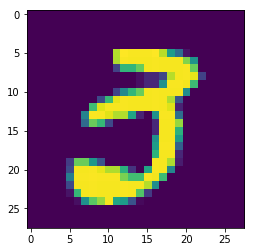

In [15]:
plt.imshow(my_img)

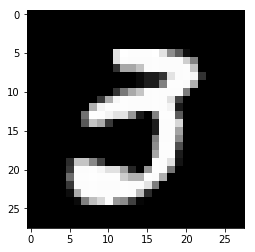

In [16]:
plt.imshow(my_img, cmap="gist_gray")

In [17]:
my_img.min()

0.0

In [18]:
my_img.max()

1.0

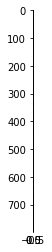

In [21]:
my_img2 = mnist.train.images[567].reshape(784,1)
plt.imshow(my_img2)

## Step 3 :  Creating our NN Model

1. Placeholders - 
2. Variables - 
3. Create our Comp. Graph Operation - 
4. Loss Function - 
5. Optmizer - , finally
6. Create and run the session


In [25]:
x = tf.placeholder(tf.float32, shape = [None, 784])

In [28]:
# Weights, Bias 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [29]:
# create the graph
y = tf.matmul(x, W) + b

In [30]:
y_true = tf.placeholder(tf.float32, shape = [None,10])

In [31]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,
                                                                         logits = y))

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [33]:
train = optimizer.minimize(cross_entropy)

In [34]:
init = tf.global_variables_initializer()

In [39]:
# Create and run Session

with tf.Session() as sess:
    sess.run(init)
    
    # Train for say 10000 steps
    for step in range(100000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})
        
        #evaluate test train model
        
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true, 1))
        
    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
        
    print(sess.run(accuracy, feed_dict= {x:mnist.test.images,
                                            y_true:mnist.test.labels}))












0.9211
